IMPORTING LIBRARIES

In [1]:
import numpy as np 
import shap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,f1_score, confusion_matrix 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
file=pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
print(file.head(5))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
file.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
file.shape

(5110, 12)

In [5]:
Imputer= SimpleImputer(strategy="mean")
file["bmi"]=Imputer.fit_transform(file["bmi"].to_numpy().reshape(-1,1))

<AxesSubplot:>

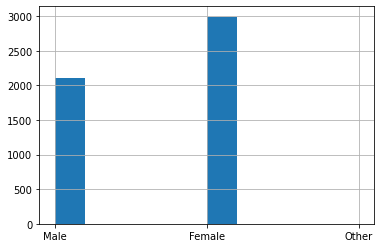

In [6]:
file["gender"].hist()

(array([434., 362., 440., 484., 597., 583., 686., 559., 407., 558.]),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]),
 <BarContainer object of 10 artists>)

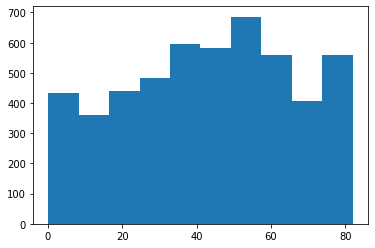

In [7]:
fig,ax=plt.subplots(figsize=(6,4))
ax.grid(False)
ax.hist(file['age'], bins=10)

(array([4612.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         498.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

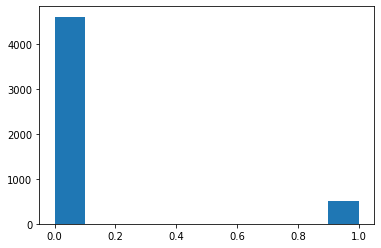

In [8]:
fig,ax=plt.subplots(figsize=(6,4))
ax.grid(False)
ax.hist(file["hypertension"])

(array([4834.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         276.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

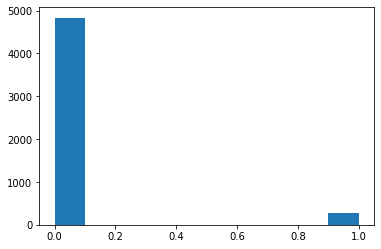

In [9]:
fig,ax=plt.subplots(figsize=(6,4))
ax.grid(False)
ax.hist(file["heart_disease"])

(array([3353.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1757.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

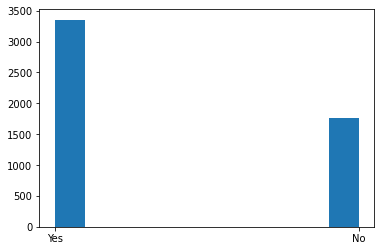

In [10]:
fig,ax=plt.subplots(figsize=(6,4))
ax.grid(False)
ax.hist(file["ever_married"])

(array([2925.,    0.,  819.,    0.,    0.,  657.,    0.,  687.,    0.,
          22.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

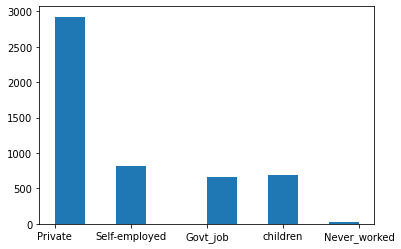

In [11]:
fig,ax=plt.subplots(figsize=(6,4))
ax.grid(False)
ax.hist(file["work_type"])

(array([2596.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2514.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

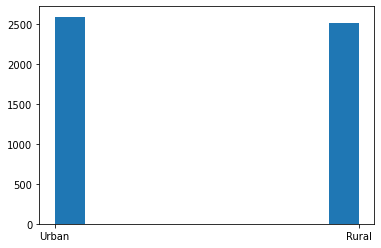

In [12]:
fig,ax=plt.subplots(figsize=(6,4))
ax.grid(False)
ax.hist(file["Residence_type"])

(array([ 885.,    0.,    0., 1892.,    0.,    0.,  789.,    0.,    0.,
        1544.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

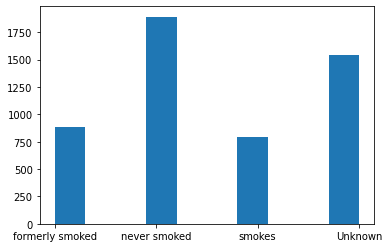

In [13]:
fig,ax=plt.subplots(figsize=(6,4))
ax.grid(False)
ax.hist(file["smoking_status"])

(array([1250., 1790.,  956.,  310.,  154.,   91.,  209.,  217.,  108.,
          25.]),
 array([ 55.12 ,  76.782,  98.444, 120.106, 141.768, 163.43 , 185.092,
        206.754, 228.416, 250.078, 271.74 ]),
 <BarContainer object of 10 artists>)

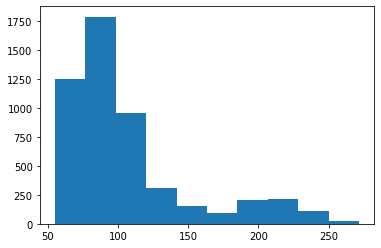

In [14]:
fig,ax=plt.subplots(figsize=(6,4))
ax.grid(False)
ax.hist(file["avg_glucose_level"])

(array([4.110e+02, 1.964e+03, 2.010e+03, 5.750e+02, 1.050e+02, 3.700e+01,
        4.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([10.3 , 19.03, 27.76, 36.49, 45.22, 53.95, 62.68, 71.41, 80.14,
        88.87, 97.6 ]),
 <BarContainer object of 10 artists>)

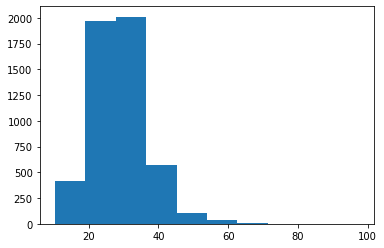

In [15]:
fig,ax=plt.subplots(figsize=(6,4))
ax.grid(False)
ax.hist(file["bmi"])

(array([4861.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         249.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

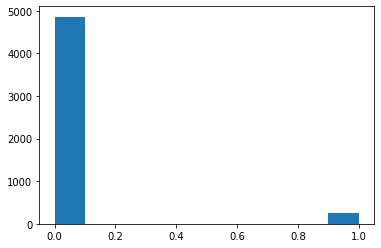

In [16]:
fig,ax=plt.subplots(figsize=(6,4))
ax.grid(False)
ax.hist(file["stroke"])

In [17]:
file.drop(["id"], axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [18]:
Encoder=LabelEncoder()
for col in file:
    if file[col].dtype=="object":
       file[col]=Encoder.fit_transform(file[col])

In [19]:
X= file.drop(["stroke"], axis=1)
Y= file["stroke"]
print(X)
print(Y)

         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_status  
0             2               1             228.69  36.

Split data to test and train

In [20]:
X_train,X_test,Y_train, Y_test= train_test_split(X,Y, random_state= 200, test_size=0.3)

Model Building

Model: RandomForestClassifier(random_state=101)
Accuracy: 0.954337899543379
F1-score: 0.0


Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1466
           1       0.00      0.00      0.00        67

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533

Model: DecisionTreeClassifier(random_state=14)
Accuracy: 0.9119373776908023
F1-score: 0.11764705882352941


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1466
           1       0.10      0.13      0.12        67

    accuracy                           0.91      1533
   macro avg       0.53      0.54      0.54      1533
weighted avg       0.92      0.91      0.92      1533

Model: SVC(kernel='linear')
Accuracy: 0.949119373776908
F1-score: 0.048780487804878044


Classificatio

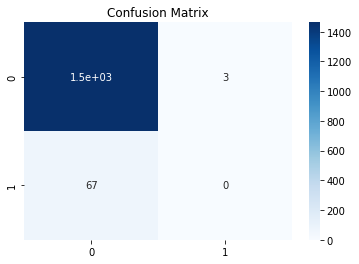

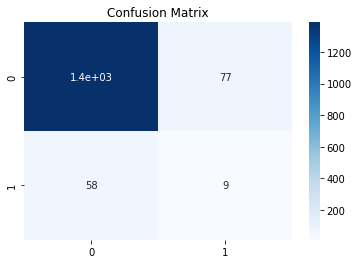

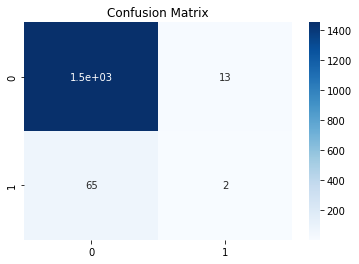

In [21]:
def model_building():
    models=[]
    accuracy=[]
    f1score=[]
    
    models.append(RandomForestClassifier(random_state=101))
    models.append(DecisionTreeClassifier(random_state= 14 ))
    models.append(SVC(kernel ="linear"))
    
    
    for model in models:
        
        # Train Model
        model.fit(X_train, Y_train)
        
        # Test Model
        pred=model.predict(X_test)
        
        #Model Accuracy and F1_Score
        accuracy.append((round(accuracy_score(Y_test, pred), 2))*100)
        f1score.append((round(f1_score(Y_test, pred), 2))*100)
        
        print(f'Model: {model}\nAccuracy: {accuracy_score(Y_test, pred)}\nF1-score: {f1_score(Y_test, pred)}\n\n')
    
        #Model Classification Report
        print("Classification Report")
        print(classification_report(Y_test,pred))
        
        
        clf=confusion_matrix(Y_test, pred)
        fig,ax=plt.subplots(figsize=(6,4))
        plt.title("Confusion Matrix")
        sns.heatmap(clf,annot=True, cmap="Blues")    

        """if model == "RandomForestClassifier":    
                # Model Feature Importance
                explainer = shap.TreeExplainer(model)

                shap_values = explainer.shap_values(X_test)
                fig,ax=plt.subplots(figsize=(6,4))
                plt.title("Feature Importance ")
                shap.summary_plot(shap_values, X_test, plot_type='bar', plot_size='auto')"""
   
    print("\n")
model_building()

Model: DecisionTreeClassifier(random_state=100)
Accuracy: 0.9106327462491846
F1-score: 0.1045751633986928


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1466
           1       0.09      0.12      0.10        67

    accuracy                           0.91      1533
   macro avg       0.53      0.53      0.53      1533
weighted avg       0.92      0.91      0.92      1533

Model: RandomForestClassifier(random_state=100)
Accuracy: 0.9549902152641878
F1-score: 0.0


Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1466
           1       0.00      0.00      0.00        67

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



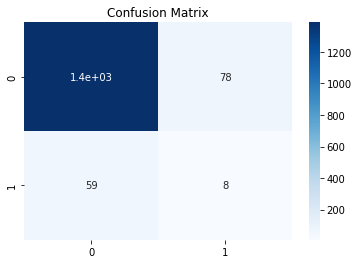

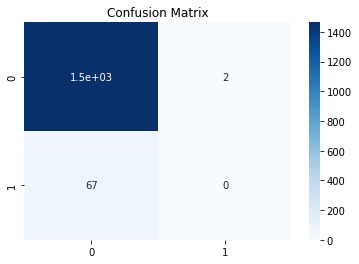

In [22]:
def model_building():
    models = []
    accuracy = []
    f1score = []
    
    models.append(DecisionTreeClassifier(random_state= 100))
    models.append(RandomForestClassifier(random_state = 100))
    #models.append(SVC(kernel= "linear"))
    
    
    for model in models:
        # Train Model
        model.fit(X_train, Y_train)
        
        # Test Model
        pred=model.predict(X_test)
        
        #Model Accuracy and F1_Score
        accuracy.append((round(accuracy_score(Y_test, pred), 2))*100)
        f1score.append((round(f1_score(Y_test, pred), 2))*100)
        
        print(f'Model: {model}\nAccuracy: {accuracy_score(Y_test, pred)}\nF1-score: {f1_score(Y_test, pred)}\n\n')
    
        #Model Classification Report
        print("Classification Report")
        print(classification_report(Y_test,pred))
        
        
        clf=confusion_matrix(Y_test, pred)
        fig,ax=plt.subplots(figsize=(6,4))
        plt.title("Confusion Matrix")
        sns.heatmap(clf,annot=True, cmap="Blues")
        
        
model_building()